In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#changing the working directory

%cd /content/gdrive/My Drive/Kaggle


/content/gdrive/My Drive/Kaggle


In [ ]:
!ls

#Check the present working directory using pwd command

BTCUSD_1hr.csv	   decoder.png	      Movie_Conversation.csv  transformer.png
BTCUSD_1min.csv    encoder_layer.png  saved_models
BTCUSD_day.csv	   encoder.png	      test.tsv
decoder_layer.png  kaggle.json	      train.tsv


In [ ]:
!ls

#Check the present working directory using pwd command

BTCUSD_1hr.csv	   decoder.png	      Movie_Conversation.csv  transformer.png
BTCUSD_1min.csv    encoder_layer.png  saved_models
BTCUSD_day.csv	   encoder.png	      test.tsv
decoder_layer.png  kaggle.json	      train.tsv


In [ ]:
import pandas as pd

df = pd.read_csv('BTCUSD_1hr.csv')
df

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
0,1586390400000,2020-04-09 00:00:00,BTCUSD,7369.60,7369.60,7338.23,7338.23,7.788915
1,1586386800000,2020-04-08 23:00:00,BTCUSD,7367.28,7398.92,7348.47,7369.60,66.558293
2,1586383200000,2020-04-08 22:00:00,BTCUSD,7337.19,7390.25,7322.87,7367.28,88.486108
3,1586379600000,2020-04-08 21:00:00,BTCUSD,7327.70,7370.00,7311.33,7337.19,35.551553
4,1586376000000,2020-04-08 20:00:00,BTCUSD,7320.11,7375.72,7313.66,7327.70,153.655811
...,...,...,...,...,...,...,...,...
39460,1444323600,2015-10-08 17:00:00,BTCUSD,244.25,244.99,244.02,244.99,3.920632
39461,1444320000,2015-10-08 16:00:00,BTCUSD,244.92,244.92,244.25,244.25,3.895252
39462,1444316400,2015-10-08 15:00:00,BTCUSD,245.00,245.00,244.92,244.92,3.016926
39463,1444312800,2015-10-08 14:00:00,BTCUSD,245.00,245.00,244.50,245.00,4.453649


In [ ]:
df.dtypes

Unix Timestamp      int64
Date               object
Symbol             object
Open              float64
High              float64
Low               float64
Close             float64
Volume            float64
dtype: object

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df1 = df[['Close']]
df1.index = df['Date']
df1

,Close
Date,
2020-04-09 00:00:00,7338.23
2020-04-08 23:00:00,7369.60
2020-04-08 22:00:00,7367.28
2020-04-08 21:00:00,7337.19
2020-04-08 20:00:00,7327.70
...,...
2015-10-08 17:00:00,244.99
2015-10-08 16:00:00,244.25
2015-10-08 15:00:00,244.92


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc81d664d50>],
      dtype=object)

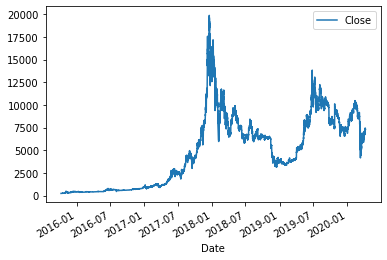

In [ ]:
df1.plot(subplots=True)

In [ ]:
df_rnn = df1.groupby(df1.index).sum()
df_rnn

,Close
Date,
2015-10-08 13:00:00,245.00
2015-10-08 14:00:00,245.00
2015-10-08 15:00:00,244.92
2015-10-08 16:00:00,244.25
2015-10-08 17:00:00,244.99
...,...
2020-04-08 20:00:00,7327.70
2020-04-08 21:00:00,7337.19
2020-04-08 22:00:00,7367.28


In [ ]:
# timesteps = 60

# timestep_idx = len(df_rnn) - timesteps
# df_val = df_rnn[timestep_idx:] 
# df_rnn = df_rnn[:timestep_idx]

In [ ]:
# len(df_val)

In [ ]:
len(df_rnn)

39465

In [ ]:
# Do Dicky Fuller test for checking stationarity
# While stationarity is not an explicit assumption of LSTM, it does help immensely in controlling error. 
# A non-stationary series will introduce more error in predictions and force errors to compound faster.

In [ ]:
# we always consider null hypothesis as: there is no correlation in the data - here that the data is non stationary
# p value is the prob that the correlation is purely due to random chance
# so if p value < 0.5: that means we can reject null hypothesis(data is non stationary) and there is some correlation in data
# Otherwise you have to try diffeerencing and make data stationary

In [ ]:
import numpy as np

x = np.log(df_rnn['Close'])

from statsmodels.tsa.stattools import adfuller

adfuller_score = adfuller(x)
adfuller_score  # 2nd value is p value, since it is less than 0.5, so we can reject null hyp, therefore data is stationary

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(-1.9206547591744128,
 0.32240771035259025,
 54,
 39410,
 {'1%': -3.4305159407760377,
  '10%': -2.566809037586306,
  '5%': -2.861613341980727},
 -258559.91012185114)

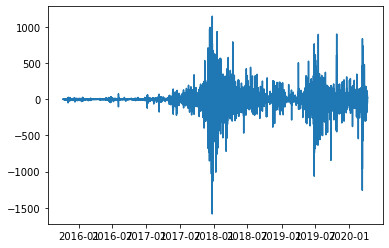

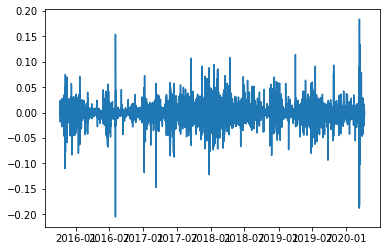

In [ ]:
# Differencing the data    # Not called but you can try

import matplotlib.pyplot as plt
diff = df_rnn['Close'].diff()  # 
plt.plot(diff)
plt.show()

diff = np.log(df_rnn['Close']).diff()  # 
plt.plot(diff)
plt.show()

In [ ]:
df_rnn['Pct_change'] = df_rnn['Close'].pct_change()
df_rnn = df_rnn[1:]
df_rnn

,Close,Pct_change
Date,,
2015-10-08 14:00:00,245.00,0.000000
2015-10-08 15:00:00,244.92,-0.000327
2015-10-08 16:00:00,244.25,-0.002736
2015-10-08 17:00:00,244.99,0.003030
2015-10-08 18:00:00,244.00,-0.004041
...,...,...
2020-04-08 20:00:00,7327.70,0.001037
2020-04-08 21:00:00,7337.19,0.001295
2020-04-08 22:00:00,7367.28,0.004101


In [ ]:
df_rnn['Increase'] = df_rnn['Pct_change'].map(lambda x:  1 if x>0 else 0)
df_rnn

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Close,Pct_change,Increase
Date,,,
2015-10-08 14:00:00,245.00,0.000000,0
2015-10-08 15:00:00,244.92,-0.000327,0
2015-10-08 16:00:00,244.25,-0.002736,0
2015-10-08 17:00:00,244.99,0.003030,1
2015-10-08 18:00:00,244.00,-0.004041,0
...,...,...,...
2020-04-08 20:00:00,7327.70,0.001037,1
2020-04-08 21:00:00,7337.19,0.001295,1
2020-04-08 22:00:00,7367.28,0.004101,1


In [ ]:
a = [[1,2],[3,4]]
a[:1]

[[1, 2]]

In [ ]:
result = []
timesteps = 100

for i in range(len(df_rnn) - timesteps):
  result.append(df_rnn['Increase'][i: i+timesteps])

# result

In [ ]:
split = 0.9
idx = int(round(split * len(result)))
result = np.array(result)

train = result[:idx]
x_train = train[:,:-1]
print(x_train)
y_train = train[:, -1]
print(y_train)

[[0 0 0 ... 0 0 1]
 [0 0 1 ... 0 1 0]
 [0 1 0 ... 1 0 0]
 ...
 [0 1 1 ... 1 1 0]
 [1 1 1 ... 1 0 0]
 [1 1 0 ... 0 0 1]]
[0 0 0 ... 0 1 0]


In [ ]:
test = result[idx:]
x_test = test[:,:-1]
y_test = test[:,-1]

In [ ]:
# Custom min max scaler

x_min = x_train.min()
print(x_min)
x_max = x_train.max()
print(x_max)

0
1


In [ ]:
def minmax(x):
  return (x - x_min) / (x_max - x_min)

def reverse_minmax(x):
  return x * (x_max - x_min) + x_min

In [ ]:
def minmax_windows(window_data):
  normalized_data = []
  for window in window_data:
    temp = [minmax(val) for val in window]
    normalized_data.append(temp)
  return normalized_data

result_norm = minmax_windows(result)
result_norm = np.array(result_norm)
print(result_norm)

[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 1. ... 1. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [1. 0. 1. ... 0. 1. 1.]
 [0. 1. 1. ... 1. 1. 1.]
 [1. 1. 0. ... 1. 1. 1.]]


In [ ]:
train_norm = result_norm[:idx]
x_train_norm = train_norm[:,:-1]
print(x_train_norm)
y_train_norm = train_norm[:, -1]
print(y_train_norm)

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 1. 0.]
 [0. 1. 0. ... 1. 0. 0.]
 ...
 [0. 1. 1. ... 1. 1. 0.]
 [1. 1. 1. ... 1. 0. 0.]
 [1. 1. 0. ... 0. 0. 1.]]
[0. 0. 0. ... 0. 1. 0.]


In [ ]:
test_norm = result_norm[idx:]
x_test_norm = test_norm[:,:-1]
y_test_norm = test_norm[:,-1]

In [ ]:
x_min_norm = x_train_norm.min()
print(x_min_norm)
x_max_norm = x_train_norm.max()
print(x_max_norm)

0.0
1.0


In [ ]:
# Data to LSTM has to be 3 Dimensional

import numpy as np

x_train_norm = np.reshape(x_train_norm, (x_train_norm.shape[0], x_train_norm.shape[1], 1))
x_test_norm = np.reshape(x_test_norm, (x_test_norm.shape[0], x_test_norm.shape[1], 1))

y_train_norm = y_train_norm.reshape(-1,1)
y_test_norm = y_test_norm.reshape(-1,1)

In [ ]:
# Data to LSTM has to be 3 Dimensional

import numpy as np

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [ ]:
# Building the LSTM model

from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import ReduceLROnPlateau  # Reduce learning rate when we reach plateus
rlrop = ReduceLROnPlateau(monitor = 'val_loss', factor=0.1, patience = 100)  # Not useful for less epochs
# Reset model if we want to re-train with different split

def reset_weights(model):
  import keras.backend as K
  session = K.get_session()
  for layer in model.layers:
    if hasattr(layer, 'kernel_initializer'):
      layer.kernel.initializer.run(session = session)
    if hasattr(layer, 'bias_initializer'):
      layer.bias.initializer.run(session = session)

epochs = 15
validation_split = 0.05

model = Sequential()
model.add(LSTM(units = 100, return_sequences = True, input_shape = (timesteps-1, 1)))
model.add(LSTM(units = 100, return_sequences = True, input_shape = (timesteps-1, 1)))
model.add(Dense(units = 1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 99, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 99, 100)           80400     
                                                                 
 dense (Dense)               (None, 99, 1)             101       
                                                                 
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# History object for plotting our model loss by epoch
history = model.fit(x_train_norm, y_train_norm, epochs = epochs, validation_split = validation_split)
# history = model.fit(X_train, y_train, epochs = epochs, validation_split = validation_split, callbacks = [rlrop])

Epoch 1/15
1052/1052 [==============================] - 65s 55ms/step - loss: 0.6930 - accuracy: 0.5090 - val_loss: 0.6925 - val_accuracy: 0.5192
Epoch 2/15
1052/1052 [==============================] - 56s 54ms/step - loss: 0.6929 - accuracy: 0.5093 - val_loss: 0.6928 - val_accuracy: 0.5109
Epoch 3/15
1052/1052 [==============================] - 56s 54ms/step - loss: 0.6926 - accuracy: 0.5131 - val_loss: 0.6926 - val_accuracy: 0.5181
Epoch 4/15
1052/1052 [==============================] - 57s 54ms/step - loss: 0.6924 - accuracy: 0.5133 - val_loss: 0.6924 - val_accuracy: 0.5182
Epoch 5/15
1052/1052 [==============================] - 57s 54ms/step - loss: 0.6929 - accuracy: 0.5112 - val_loss: 0.6926 - val_accuracy: 0.5184
Epoch 6/15
1052/1052 [==============================] - 57s 54ms/step - loss: 0.6925 - accuracy: 0.5124 - val_loss: 0.6924 - val_accuracy: 0.5183
Epoch 7/15
1052/1052 [==============================] - 57s 54ms/step - loss: 0.6930 - accuracy: 0.5084 - val_loss: 0.6927 -

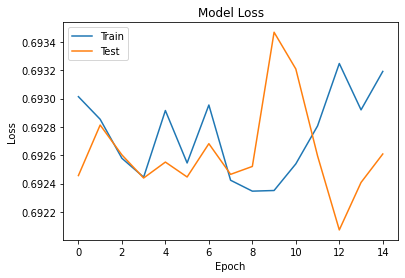

In [ ]:
# Loss History
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
len(test)

3936

In [ ]:
x_test_norm[-1][0,0]

1.0

In [ ]:
print(len(x_test_norm))
print(len(x_test_norm[0]))

3936
99


In [1]:
# # Predicting the future for 1 window and check with validation dataframe

final_future = []
timesteps_to_predict = len(x_test_norm[0])
windows_to_predict = 200
curr_frame = x_train_norm[-1]

for i in range(windows_to_predict):

  future = []
  for i in range(timesteps_to_predict):
    pred = model.predict(curr_frame[np.newaxis,:,:])[0,0]
    future.append(pred)
    curr_frame = np.insert(curr_frame, len(x_train_norm[0]), future[-1], axis = 0)
    curr_frame = curr_frame[1:]

  final_future.extend(future)
  curr_frame = x_test_norm[i]  # for next prediction
  

In [ ]:
len(final_future)

19800

In [ ]:
len(final_future)

19800

In [ ]:
len(y_test_norm)

3936

In [ ]:
# Finding accuracy, after this there is code for plotting graphs


score = 0
y_test_results = np.hstack((y_test_norm, final_future[]))
print(y_test_results)
total = windows_to_predict

for i in range(windows_to_predict):
  if y_test_results[i][0] == y_test_results[i][0]:
    score = score + 1

print((score/total)/100)

[[1.         0.48999333]
 [0.         0.48999333]
 [0.         0.48030183]
 ...
 [1.         0.48030183]
 [1.         0.48030183]
 [1.         0.48999333]]
0.01


In [ ]:
# # Predicting the future for 1 window and check with validation dataframe

reverse_curr_frame1 = pd.DataFrame({'Close': [reverse_minmax(x) for x in x_train_norm[-1]]})
reverse_future1 = pd.DataFrame({'Close': [reverse_minmax(x) for x in future]})

In [ ]:
# # Predicting the future for 1 window and check with validation dataframe

reverse_future2 = reverse_future1

reverse_future2.index = reverse_future2.index + len(reverse_curr_frame1)

In [ ]:
len(reverse_curr_frame1)

59

See Plot for input actuals and predicted


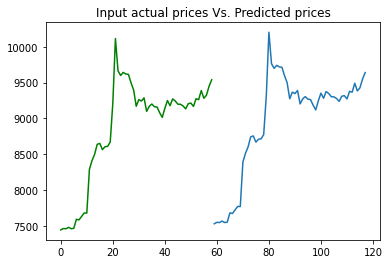

In [ ]:
print("See Plot for input actuals and predicted")
plt.plot(reverse_curr_frame1['Close'], color = 'green')
plt.plot(reverse_future2['Close'])
plt.title("Input actual prices Vs. Predicted prices")
plt.show()

In [ ]:
# Additionally, can consider features like fundamentals of company data like quarterly earnings, pe ratio, sentiment in news, press statements.